##ABSTRACT
Este proyecto presenta un análisis del libro **"The Adventures of Sherlock Holmes"** mediante técnicas de procesamiento del lenguaje natural (NLP).

Inicialmente, se utilizó SpaCy para realizar tokenización, eliminación de stopwords y lematización, lo que permitió estructurar el texto y reducir redundancias lingüísticas.

A continuación, se generaron embeddings de palabras utilizando Word2Vec, que capturan relaciones semánticas y patrones en el contexto narrativo. Este enfoque combinó las capacidades analíticas de SpaCy con el modelado vectorial de Word2Vec para resaltar dinámicas lingüísticas y semánticas del texto. Los resultados demuestran cómo las técnicas de NLP pueden complementar el análisis literario tradicional, proporcionando perspectivas innovadoras sobre textos clásicos.

#CARGA DE LIBRERIAS

In [1]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.7 MB/s eta 0:00:00


In [2]:
# Instalar el modelo
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Instalar el modelo
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#CARGA DEL LIBRO "The Adventures of Sherlock Holmes"

In [4]:
import pdfplumber

# Ruta del PDF
ruta_pdf = "The Adventures of Sherlock Holmes.pdf"

# Abrir el PDF
texto_completo = ""
with pdfplumber.open(ruta_pdf) as pdf:
    for i, pagina in enumerate(pdf.pages):
        # Extraer texto de la página
        texto = pagina.extract_text()
        if texto:
            texto_completo += texto + "\n"  # Agregar texto de cada página

# Guardar el texto en un archivo .txt
ruta_salida = "texto_libro.txt"
with open(ruta_salida, "w", encoding="utf-8") as archivo:
    archivo.write(texto_completo)

print(f"Texto extraído guardado en {ruta_salida}")

Texto extraído guardado en texto_libro.txt


In [5]:
cantidad_caracteres = len(texto_completo)
cantidad_caracteres

559161

In [6]:
texto_completo[:10000]

'The Adventures of Sherlock Holmes\nby Arthur Conan Doyle\n________________________________________\nContents\nI. A Scandal in Bohemia\nII. The Red-Headed League\nIII. A Case of Identity\nIV. The Boscombe Valley Mystery\nV. The Five Orange Pips\nVI. The Man with the Twisted Lip\nVII. The Adventure of the Blue Carbuncle\nVIII. The Adventure of the Speckled Band\nIX. The Adventure of the Engineer’s Thumb\nX. The Adventure of the Noble Bachelor\nXI. The Adventure of the Beryl Coronet\nXII. The Adventure of the Copper Beeches\nI.\nA SCANDAL IN BOHEMIA\nI.\nTo Sherlock Holmes she is always the woman. I have seldom heard him mention her under any\nother name. In his eyes she eclipses and predominates the whole of her sex. It was not that he\nfelt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were\nabhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect\nreasoning and observing machine that the world has seen, but as



---



# PROCESAMIENTO

#1.SpaCy

### DETECCIÓN DE ORACIONES

Versión **"Small"**

---



In [7]:
# Importar spaCy y cargar el modelo
import spacy
import pandas as pd

# Cargar el modelo de SpaCy
nlp_sm = spacy.load('en_core_web_sm')

# Procesar el texto completo
doc_sm = nlp_sm(texto_completo)

# Tokenizar oraciones
oraciones = list(doc_sm.sents)

# Crear una lista de tuplas (oración, token)
data = []
for oracion in oraciones:
    for token in oracion:
        data.append((oracion.text, token.text,token.idx, token.text_with_ws,token.is_alpha, token.is_punct, token.is_space, token.shape_, token.is_stop, token.lemma_, token.pos_,
         token.tag_, token.dep_, token.ent_type_, token.ent_iob_, token.morph,spacy.explain(token.tag_)))


#Lista de Columnas
columnas=['oracion','token','idx','text_with_ws','is_alpha','is_punct','is_space','shape_','is_stop','lemma_','pos_','tag_','dep_','ent_type_','ent_iob_','morph','explain']

# Convertir la lista de tuplas en un DataFrame
df_oraciones = pd.DataFrame(data,columns=columnas)

# Mostrar el DataFrame
print(df_oraciones)


                                                  oracion         token  \
0       The Adventures of Sherlock Holmes\nby Arthur C...           The   
1       The Adventures of Sherlock Holmes\nby Arthur C...    Adventures   
2       The Adventures of Sherlock Holmes\nby Arthur C...            of   
3       The Adventures of Sherlock Holmes\nby Arthur C...      Sherlock   
4       The Adventures of Sherlock Holmes\nby Arthur C...        Holmes   
...                                                   ...           ...   
134896  As to Miss Violet Hunter, my\nfriend Holmes, r...          with   
134897  As to Miss Violet Hunter, my\nfriend Holmes, r...  considerable   
134898  As to Miss Violet Hunter, my\nfriend Holmes, r...       success   
134899  As to Miss Violet Hunter, my\nfriend Holmes, r...             .   
134900  As to Miss Violet Hunter, my\nfriend Holmes, r...            \n   

           idx   text_with_ws  is_alpha  is_punct  is_space shape_  is_stop  \
0            0      

In [8]:
# Contar la cantidad de oraciones únicas en el DataFrame
cantidad_oraciones = df_oraciones['oracion'].nunique()

# Mostrar el resultado
print("Cantidad de oraciones:", cantidad_oraciones)


Cantidad de oraciones: 5843


###TOKENIZACION

In [9]:
cols=['token','idx','text_with_ws','is_alpha','is_punct','is_space','shape_','is_stop']
print(df_oraciones[cols])

               token     idx   text_with_ws  is_alpha  is_punct  is_space  \
0                The       0           The       True     False     False   
1         Adventures       4    Adventures       True     False     False   
2                 of      15            of       True     False     False   
3           Sherlock      18      Sherlock       True     False     False   
4             Holmes      27         Holmes      True     False     False   
...              ...     ...            ...       ...       ...       ...   
134896          with  559134          with       True     False     False   
134897  considerable  559139  considerable       True     False     False   
134898       success  559152        success      True     False     False   
134899             .  559159              .     False      True     False   
134900            \n  559160             \n     False     False      True   

       shape_  is_stop  
0         Xxx     True  
1       Xxxxx    False  


###STOPWORDS

In [10]:
# Filtrar los tokens que son stopwords
stopwords_df = df_oraciones[df_oraciones['is_stop'] == True]

# Mostrar las stopwords
print(stopwords_df[['token', 'is_stop']])


       token  is_stop
0        The     True
2         of     True
6         by     True
55         A     True
57        in     True
...      ...      ...
134890     I     True
134892  that     True
134893   she     True
134894   has     True
134896  with     True

[66023 rows x 2 columns]


In [11]:
# Contar la cantidad de stopwords en el DataFrame
cantidad_stopwords = stopwords_df.shape[0]
print("Cantidad de stopwords:", cantidad_stopwords)


Cantidad de stopwords: 66023


In [12]:
# Filtrar los tokens que no son stopwords
df_sin_stopwords = df_oraciones[df_oraciones['is_stop'] == False]

# Mostrar el DataFrame sin stopwords
print(df_sin_stopwords[['token', 'is_stop']])


               token  is_stop
1         Adventures    False
3           Sherlock    False
4             Holmes    False
5                 \n    False
7             Arthur    False
...              ...      ...
134895           met    False
134897  considerable    False
134898       success    False
134899             .    False
134900            \n    False

[68878 rows x 2 columns]


###LEMATIZACION

In [13]:
filtro=df_sin_stopwords['token'].str.lower() != df_sin_stopwords['lemma_'].str.lower()
df_diff2= df_sin_stopwords[filtro]


In [14]:
print(df_diff2[['token','lemma_']].head(40))

            token       lemma_
172         heard         hear
184          eyes          eye
186      eclipses      eclipse
188  predominates  predominate
201          felt         feel
212      emotions      emotion
245     observing      observe
251          seen          see
260        placed        place
270         spoke        speak
273        softer         soft
274      passions      passion
288        things        thing
295       drawing         draw
299           men          man
302       motives       motive
304       actions       action
309       trained        train
314    intrusions    intrusion
322      adjusted       adjust
328   distracting     distract
340       results       result
360        lenses        lense
408          seen          see
417       drifted        drift
434       centred       centre
435     interests     interest
445         finds         find
466       loathed       loathe
477      remained       remain
481      lodgings      lodging
486     

La lematización ha sido efectiva en el conjunto de datos, ya que las palabras se han transformado correctamente a su forma base.

Por ejemplo:

"heard" -> "hear"

"eyes" -> "eye"

"eclipses" -> "eclipse"

"predominates" -> "predominate"

Esto muestra que el modelo ha manejado correctamente sustantivos y verbos en diferentes tiempos y formas, reduciendo la variabilidad innecesaria en el texto y facilitando el análisis posterior.


**Sustantivos abstractos y conceptos:**

Palabras como "emotions" -> "emotion", "actions" -> "action", y "intrusions" -> "intrusion" están bien normalizadas.



##FRECUENCIAS DE PALABRAS

###Remuevo saltos de linea

In [15]:
print(df_sin_stopwords['oracion'])

1         The Adventures of Sherlock Holmes\nby Arthur C...
3         The Adventures of Sherlock Holmes\nby Arthur C...
4         The Adventures of Sherlock Holmes\nby Arthur C...
5         The Adventures of Sherlock Holmes\nby Arthur C...
7         The Adventures of Sherlock Holmes\nby Arthur C...
                                ...                        
134895    As to Miss Violet Hunter, my\nfriend Holmes, r...
134897    As to Miss Violet Hunter, my\nfriend Holmes, r...
134898    As to Miss Violet Hunter, my\nfriend Holmes, r...
134899    As to Miss Violet Hunter, my\nfriend Holmes, r...
134900    As to Miss Violet Hunter, my\nfriend Holmes, r...
Name: oracion, Length: 68878, dtype: object


In [16]:
# Paso1: Eliminar los saltos de línea de la columna 'oracion'
df_sin_stopwords.loc[:, 'oracion'] = df_sin_stopwords['oracion'].str.replace(r'\n', ' ', regex=True)
print(df_sin_stopwords['oracion'])

1         The Adventures of Sherlock Holmes by Arthur Co...
3         The Adventures of Sherlock Holmes by Arthur Co...
4         The Adventures of Sherlock Holmes by Arthur Co...
5         The Adventures of Sherlock Holmes by Arthur Co...
7         The Adventures of Sherlock Holmes by Arthur Co...
                                ...                        
134895    As to Miss Violet Hunter, my friend Holmes, ra...
134897    As to Miss Violet Hunter, my friend Holmes, ra...
134898    As to Miss Violet Hunter, my friend Holmes, ra...
134899    As to Miss Violet Hunter, my friend Holmes, ra...
134900    As to Miss Violet Hunter, my friend Holmes, ra...
Name: oracion, Length: 68878, dtype: object


In [17]:
# Paso 2: Eliminar las filas donde el 'token' es un salto de línea '\n'
df = df_sin_stopwords[df_sin_stopwords['token'] != '\n']

# Mostrar las primeras filas del DataFrame limpio
print(df.head())


                                             oracion       token  idx  \
1  The Adventures of Sherlock Holmes by Arthur Co...  Adventures    4   
3  The Adventures of Sherlock Holmes by Arthur Co...    Sherlock   18   
4  The Adventures of Sherlock Holmes by Arthur Co...      Holmes   27   
7  The Adventures of Sherlock Holmes by Arthur Co...      Arthur   37   
8  The Adventures of Sherlock Holmes by Arthur Co...       Conan   44   

  text_with_ws  is_alpha  is_punct  is_space shape_  is_stop      lemma_  \
1  Adventures       True     False     False  Xxxxx    False  Adventures   
3    Sherlock       True     False     False  Xxxxx    False    Sherlock   
4       Holmes      True     False     False  Xxxxx    False      Holmes   
7      Arthur       True     False     False  Xxxxx    False      Arthur   
8       Conan       True     False     False  Xxxxx    False       Conan   

    pos_  tag_      dep_ ent_type_ ent_iob_          morph  \
1  PROPN  NNPS      ROOT                  

In [18]:
from collections import Counter

# Paso 1: Filtrar los tokens que no sean stopwords ni puntuación
# Aquí asumimos que la columna 'is_stop' indica si es stopword y 'is_punct' si es puntuación
filtered_tokens = df.loc[(df['is_stop'] == False) & (df['is_punct'] == False), 'token']

# Paso 2: Contar la frecuencia de las palabras
word_freq = Counter(filtered_tokens)

# Paso 3: Obtener las 20 palabras más comunes
common_words = word_freq.most_common(20)
print("Palabras más comunes:", common_words)

# Paso 4: Obtener las palabras que aparecen solo una vez (frecuencia = 1)
unique_words = [word for word, freq in word_freq.items() if freq == 1]
print("Palabras únicas (frecuencia = 1):", unique_words)


Palabras más comunes: [('said', 486), ('Holmes', 459), ('man', 302), ('Mr.', 272), ('little', 269), ('think', 172), ('room', 171), ('know', 170), ('shall', 168), ('time', 151), ('came', 146), ('come', 146), ('door', 144), ('face', 128), ('matter', 125), ('hand', 120), ('night', 118), ('way', 116), ('house', 116), ('case', 115)]
Palabras únicas (frecuencia = 1): ['Adventures', 'Conan', 'Doyle', 'Contents', 'Headed', 'Case', 'Identity', 'Mystery', 'Orange', 'Pips', 'Twisted', 'Lip', 'Blue', 'Carbuncle', 'Speckled', 'Band', 'Engineer', 'Thumb', 'Noble', 'Bachelor', 'SCANDAL', 'BOHEMIA', 'eclipses', 'predominates', 'sex', 'emotions', 'abhorrent', 'balanced', 'softer', 'passions', 'gibe', 'intrusions', 'finely', 'temperament', 'distracting', 'mental', 'Grit', 'sensitive', 'lenses', 'disturbing', 'dubious', 'centred', 'establishment', 'absorb', 'loathed', 'alternating', 'ambition', 'drowsiness', 'occupied', 'Odessa', 'Trepoff', 'Atkinson', 'brothers', 'Trincomalee', 'delicately', 'successful

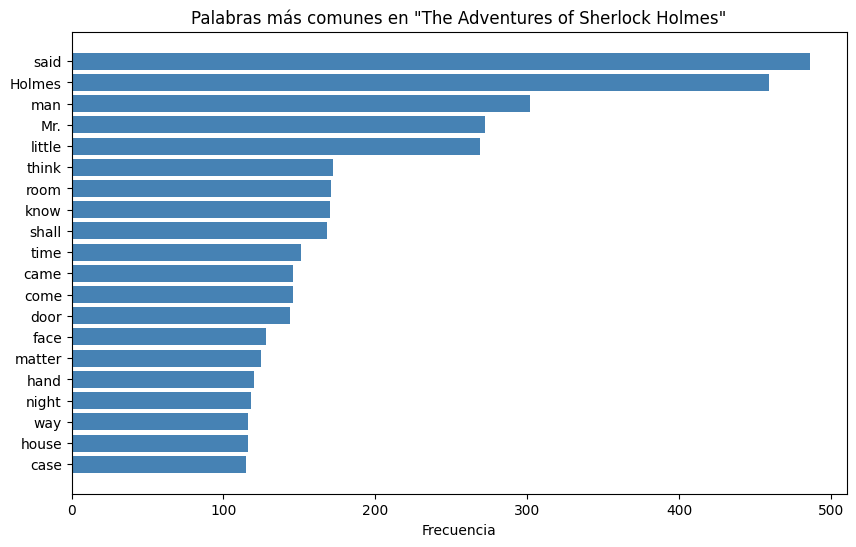

In [19]:
import matplotlib.pyplot as plt

# Datos de las palabras más comunes (palabras y sus frecuencias)
palabras_frecuentes = [('said', 486), ('Holmes', 459), ('man', 302),
                       ('Mr.', 272), ('little', 269), ('think', 172),
                       ('room', 171), ('know', 170), ('shall', 168),
                       ('time', 151), ('came', 146), ('come', 146),
                       ('door', 144), ('face', 128), ('matter', 125),
                       ('hand', 120), ('night', 118), ('way', 116),
                       ('house', 116), ('case', 115)]

#Separar palabras y frecuencias en dos listas
palabras = [item[0] for item in palabras_frecuentes]
frecuencias = [item[1] for item in palabras_frecuentes]

#Crear el gráfico de barras (opcional: invertir las listas para mostrar de mayor a menor)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(palabras, frecuencias, color='steelblue')  # Gráfico de barras horizontal
plt.xlabel('Frecuencia')  # Etiqueta del eje X
plt.title('Palabras más comunes en "The Adventures of Sherlock Holmes"')  # Título del gráfico

#Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje Y para que la palabra más frecuente esté arriba
plt.show()


##POS Tagging

In [20]:
cols=['token','pos_','tag_','explain']

  # Filtrar los tokens que no son stopwords
df_pos_tag = df[cols]

# Mostrar el DataFrame sin stopwords
print(df_pos_tag[cols])


               token   pos_  tag_  \
1         Adventures  PROPN  NNPS   
3           Sherlock  PROPN   NNP   
4             Holmes  PROPN   NNP   
7             Arthur  PROPN   NNP   
8              Conan  PROPN   NNP   
...              ...    ...   ...   
134891       believe   VERB   VBP   
134895           met   VERB   VBN   
134897  considerable    ADJ    JJ   
134898       success   NOUN    NN   
134899             .  PUNCT     .   

                                                  explain  
1                                     noun, proper plural  
3                                   noun, proper singular  
4                                   noun, proper singular  
7                                   noun, proper singular  
8                                   noun, proper singular  
...                                                   ...  
134891              verb, non-3rd person singular present  
134895                              verb, past participle  
134897  adjecti

In [21]:
# Paso 1: Filtrar los sustantivos (NOUN) y adjetivos (ADJ) usando la columna 'pos_'
nouns = df.loc[df['pos_'] == 'NOUN', 'token'].tolist()
adjectives = df.loc[df['pos_'] == 'ADJ', 'token'].tolist()

# Paso 2: Imprimir las listas de sustantivos y adjetivos
print("Sustantivos (NOUN):", nouns)
print("Adjetivos (ADJ):", adjectives)


Sustantivos (NOUN): ['I.', 'Scandal', 'SCANDAL', 'I.', 'woman', 'eyes', 'sex', 'emotion', 'emotions', 'mind', 'reasoning', 'machine', 'world', 'lover', 'position', 'passions', 'gibe', 'sneer', 'things', 'observer', 'veil', 'men', 'motives', 'actions', 'reasoner', 'intrusions', 'temperament', 'factor', 'doubt', 'results', 'Grit', 'instrument', 'crack', 'power', 'lenses', 'emotion', 'nature', 'woman', 'woman', 'memory', 'marriage', 'happiness', 'home', 'interests', 'man', 'master', 'establishment', 'attention', 'form', 'society', 'soul', 'lodgings', 'books', 'week', 'week', 'cocaine', 'ambition', 'drowsiness', 'drug', 'energy', 'nature', 'study', 'crime', 'faculties', 'powers', 'observation', 'clues', 'mysteries', 'police', 'time', 'time', 'account', 'doings', 'summons', 'case', 'murder', 'clearing', 'tragedy', 'brothers', 'mission', 'family', 'signs', 'activity', 'readers', 'press', 'friend', 'companion', 'night', 'twentieth', 'journey', 'patient', 'practice', 'way', 'door', 'mind', 'wo

###FRECUENCIA DE SUSTANTIVOS Y ADJETIVOS

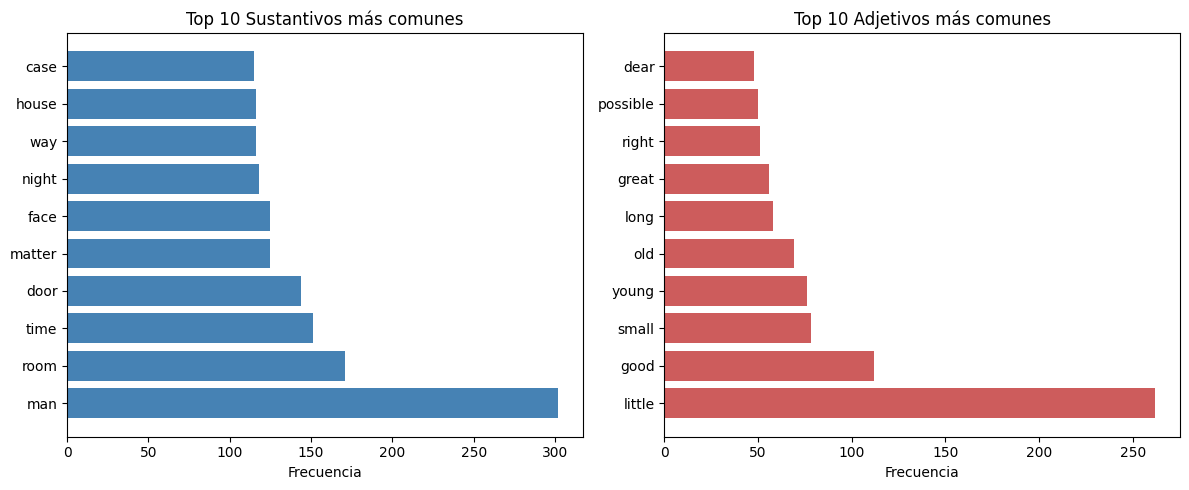

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

# Contar la frecuencia de sustantivos y adjetivos
nouns_freq = Counter(nouns)
adjectives_freq = Counter(adjectives)

# Obtener los 10 más comunes
common_nouns = nouns_freq.most_common(10)
common_adjectives = adjectives_freq.most_common(10)

# Desempaquetar para graficar
nouns_words, nouns_counts = zip(*common_nouns)
adjectives_words, adjectives_counts = zip(*common_adjectives)

# Gráfico de barras
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.barh(nouns_words, nouns_counts, color='steelblue')
plt.title('Top 10 Sustantivos más comunes')
plt.xlabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.barh(adjectives_words, adjectives_counts, color='indianred')
plt.title('Top 10 Adjetivos más comunes')
plt.xlabel('Frecuencia')

plt.tight_layout()
plt.show()


##RELACION ENTRE SUSTANTIVOS Y ADJETIVOS (PAREJAS)

In [23]:
df.reset_index(drop=True, inplace=True)

# Crear parejas (sustantivo, adjetivo) por posición en la oración
pairs = []

for i in range(len(df) - 1):
    if df.loc[i, 'pos_'] == 'NOUN' and df.loc[i + 1, 'pos_'] == 'ADJ':
        noun = df.loc[i, 'token']
        adj = df.loc[i + 1, 'token']
        pairs.append((noun, adj))

# Contar la frecuencia de las parejas
pair_freq = Counter(pairs)

# Mostrar las 10 combinaciones más comunes
common_pairs = pair_freq.most_common(10)
print("Parejas (sustantivo, adjetivo) más comunes:", common_pairs)


Parejas (sustantivo, adjetivo) más comunes: [(('years', 'old'), 4), (('clearing', 'singular'), 2), (('room', 'uncontrollable'), 2), (('matter', 'delicate'), 2), (('centre', 'little'), 2), (('eyes', 'open'), 2), (('fashion', 'peculiar'), 2), (('mother', 'alive'), 2), (('case', 'great'), 2), (('course', 'obvious'), 2)]


El análisis de patrones frecuentes en la descripción, basado en el contexto narrativo, resalta cómo la combinación de sustantivos y adjetivos se utiliza para crear una atmósfera visual y emocional. Este tipo de descripciones es común en textos narrativos como *The Adventures of Sherlock Holmes*, donde los adjetivos ayudan a caracterizar objetos, personas o conceptos, e intensificar la atmósfera.


1. **Descripción detallada**: Los adjetivos se combinan con sustantivos para proporcionar una imagen más clara, como en "eyes open" (ojos abiertos), que sugiere atención o vigilancia, o "case great" (gran caso), que resalta la importancia del misterio.


2. **Adjetivos cualitativos o de juicio**: Muchos adjetivos implican una valoración subjetiva, como en "delicate matter" (cuestión delicada), lo que denota una situación compleja, o "obvious course" (camino obvio), que señala una acción lógica dentro del contexto.


3. **Acción o estado**: Algunos sustantivos y adjetivos se vinculan con cambios en la escena, como "room uncontrollable" (habitación incontrolable), que implica caos, o "clearing singular" (despeje singular), que destaca un espacio único relevante para la investigación.


4. **Expresiones idiomáticas o fórmulas comunes**: Existen combinaciones que son frases fijas, como "years old" (años de edad), o expresiones más figurativas como "eyes open" que también puede interpretarse como una alerta para estar atento.


5. **Contexto específico (Sherlock Holmes)**: Algunas combinaciones están alineadas con los temas de la obra, como "case great" que podría referirse a un misterio importante en la historia, o "matter delicate" que alude a situaciones que requieren gran cuidado, esenciales en la resolución de los casos de Holmes.



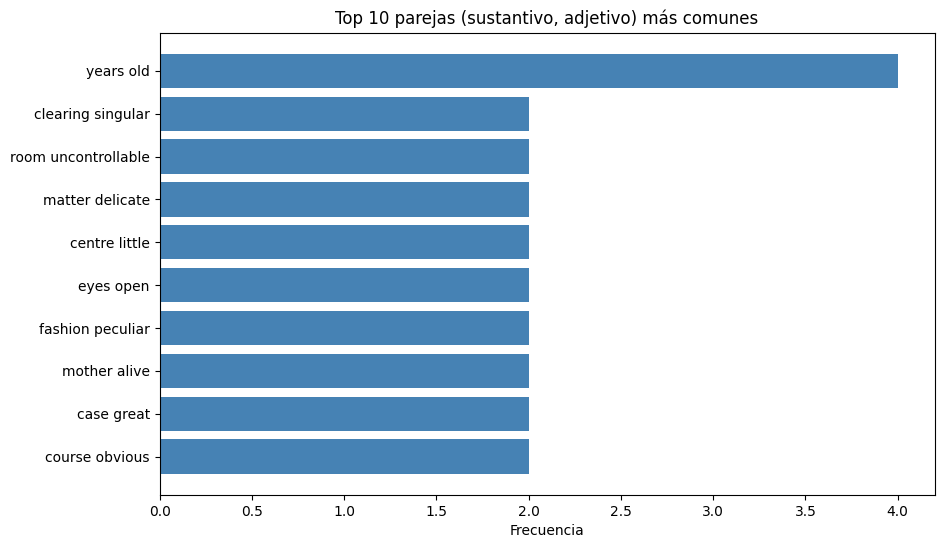

In [24]:
import matplotlib.pyplot as plt

#Parejas de (sustantivo, adjetivo) más comunes con sus frecuencias
common_pairs = [(('years', 'old'), 4),
                (('clearing', 'singular'), 2),
                (('room', 'uncontrollable'), 2),
                (('matter', 'delicate'), 2),
                (('centre', 'little'), 2),
                (('eyes', 'open'), 2),
                (('fashion', 'peculiar'), 2),
                (('mother', 'alive'), 2),
                (('case', 'great'), 2),
                (('course', 'obvious'), 2)]

#Desempaquetar los datos
pairs, counts = zip(*common_pairs)  # Extraer las parejas y sus frecuencias
labels = [f'{noun} {adj}' for noun, adj in pairs]  # Unir la pareja para mostrar como texto

#Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(labels, counts, color='steelblue')  # Gráfico de barras horizontales

#Personalización del gráfico
plt.xlabel('Frecuencia')  # Etiqueta del eje X
plt.title('Top 10 parejas (sustantivo, adjetivo) más comunes')  # Título del gráfico
plt.gca().invert_yaxis()  # Invertir el eje Y para que la más común esté arriba
plt.show()


##ANALISIS DE SENTIMIENTO DE LOS ADJETIVOS

In [25]:
from textblob import TextBlob

# Calcular la polaridad de cada adjetivo
adjective_polarity = {adj: TextBlob(adj).sentiment.polarity for adj in adjectives}

# Mostrar la polaridad de los primeros 10 adjetivos
print("Polaridad de los primeros 10 adjetivos:", list(adjective_polarity.items())[:10])

# Calcular la polaridad promedio
avg_polarity = sum(adjective_polarity.values()) / len(adjective_polarity)
print("Polaridad promedio de los adjetivos:", avg_polarity)


Polaridad de los primeros 10 adjetivos: [('akin', 0.0), ('abhorrent', -0.7), ('cold', -0.6), ('precise', 0.4), ('balanced', 0.0), ('perfect', 1.0), ('false', -0.4000000000000001), ('softer', 0.0), ('admirable', 0.0), ('excellent', 1.0)]
Polaridad promedio de los adjetivos: 0.010785837458699914


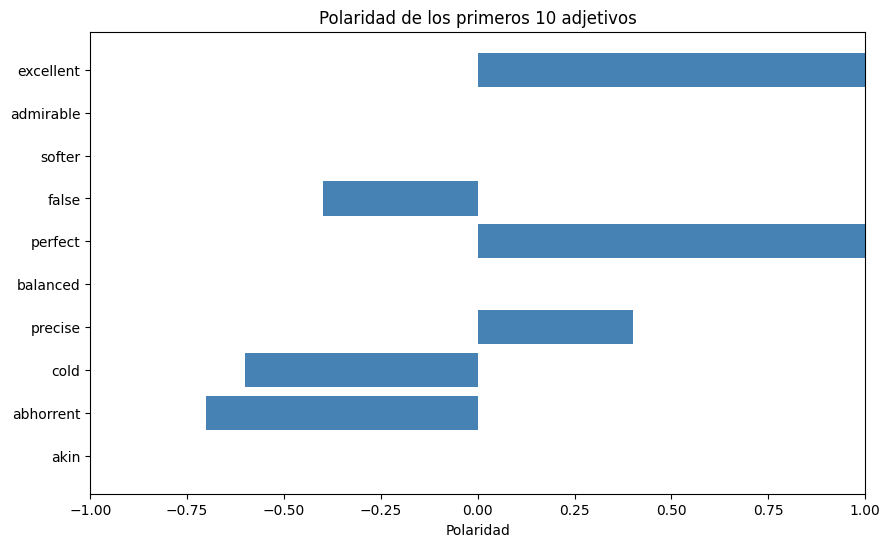

In [26]:
import matplotlib.pyplot as plt

# Lista de adjetivos con su polaridad
adjectives = ['akin', 'abhorrent', 'cold', 'precise', 'balanced', 'perfect', 'false', 'softer', 'admirable', 'excellent']
polarities = [0.0, -0.7, -0.6, 0.4, 0.0, 1.0, -0.4, 0.0, 0.0, 1.0]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(adjectives, polarities, color='steelblue')

# Personalización del gráfico
plt.xlabel('Polaridad')
plt.title('Polaridad de los primeros 10 adjetivos')
plt.xlim(-1, 1)  # Limitar los valores de la polaridad entre -1 y 1

# Mostrar el gráfico
plt.show()


La polaridad promedio de los adjetivos es muy cercana a cero (0.01), lo que indica que la mayoría de los adjetivos no tienen una carga emocional fuerte en términos positivos o negativos. Sin embargo, al observar la polaridad individual de los adjetivos, se destacan algunos con valores positivos y negativos:

- **Adjetivos positivos**: "perfect" (1.0), "excellent" (1.0), "precise" (0.4), que reflejan características favorables o de alta calidad.

- **Adjetivos negativos**: "abhorrent" (-0.7), "cold" (-0.6), "false" (-0.4), que transmiten desaprobación o características no deseadas.

- **Adjetivos neutros**: "akin" (0.0), "balanced" (0.0), "softer" (0.0), "admirable" (0.0), que no aportan una carga emocional clara.

##VISUALIZACION con spaCy

In [27]:
# Importar spaCy y cargar el modelo
import spacy
import pandas as pd

# Cargar el modelo de SpaCy
nlp_sm = spacy.load('en_core_web_sm')

In [28]:
from spacy import displacy
#texto2 = ('I have seldom heard him mention her under any other name') # Pocas veces le he oído mencionarla con otro nombre.
texto2=("In his eyes she eclipses and predominates the whole of her sex")
#texto2=('To Sherlock Holmes she is always the woman.') # Para Sherlock Holmes ella siempre es la mujer.
t2 = nlp_sm(texto2)
displacy.render(t2, style='dep',jupyter=True)

#2.WORD2VEC

In [31]:
!pip install gensim -q

In [32]:
import nltk  # Asegúrate de tener instalada la biblioteca nltk
import string  # Para manejar signos de puntuación
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


nltk.download('punkt')  # Paquete para tokenización
nltk.download('wordnet')  # Paquete para lematización
nltk.download('omw-1.4')  # Corpus adicional para lematización
nltk.download('punkt_tab')
nltk.download('stopwords')  # Descargar stopwords


# Inicializamos el lematizador y cargamos las stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Eliminamos los saltos de línea y otros caracteres innecesarios

texto_completo = texto_completo.replace('\n', ' ').replace('\r', ' ').strip()
# Texto de ejemplo para probar

# Texto de ejemplo para probar
#texto_completo = """He said that he was going to the park. She says the same thing every day."""

#texto_completo = """This is an example sentence.I said that this is funny. It should be tokenized, lemmatized, and cleaned from stopwords and punctuation."""


# Tokenizamos el texto en oraciones y luego en palabras
sentences = []
for sentence in nltk.sent_tokenize(texto_completo, language='english'):
    # Tokenizamos y convertimos a minúsculas
    filtered_tokens = nltk.word_tokenize(sentence.lower(), language='english')

    # Eliminamos las stopwords y los signos de puntuación
    filtered_tokens = [word for word in filtered_tokens if word not in stop_words and word not in string.punctuation]

    # Lematizamos cada palabra, especificando 'v' para verbos
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]

    # Imprimimos las palabras originales y las lematizadas para comparar
    for word, lemmatized_word in zip(filtered_tokens, lemmatized_tokens):
        print(f"Original: {word}, Lematizado: {lemmatized_word}")

    # Agregamos las palabras lematizadas a la lista de oraciones
    sentences.append(lemmatized_tokens)


## Ahora `sentences` es una lista de listas de palabras lematizadas sin stopwords ni signos de puntuación


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Se han truncado las últimas 5000 líneas del flujo de salida.
Original: draw, Lematizado: draw
Original: bound, Lematizado: bind
Original: say, Lematizado: say
Original: occasionally, Lematizado: occasionally
Original: embellish, Lematizado: embellish
Original: given, Lematizado: give
Original: prominence, Lematizado: prominence
Original: much, Lematizado: much
Original: many, Lematizado: many
Original: causes, Lematizado: cause
Original: célèbres, Lematizado: célèbres
Original: sensational, Lematizado: sensational
Original: trials, Lematizado: trials
Original: figured, Lematizado: figure
Original: rather, Lematizado: rather
Original: incidents, Lematizado: incidents
Original: may, Lematizado: may
Original: trivial, Lematizado: trivial
Original: given, Lematizado: give
Original: room, Lematizado: room
Original: faculties, Lematizado: faculties
Original: deduction, Lematizado: deduction
Original: logical, Lematizado: logical
Original: synthesis, Lematizado: synthesis
Original: made, Lema

In [33]:
from gensim.models import Word2Vec

# Entrenar el modelo Word2Vec
#model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, alpha=0.025)

# Guardar el modelo para usarlo más tarde
model.save("word2vec.model")

In [34]:
# Convertir cada palabra en su propia lista
transformed_sentences = [[word] for sentence in sentences for word in sentence]
print(transformed_sentences)

[['adventure'], ['sherlock'], ['holmes'], ['arthur'], ['conan'], ['doyle'], ['________________________________________'], ['content'], ['scandal'], ['bohemia'], ['ii'], ['red-headed'], ['league'], ['iii'], ['case'], ['identity'], ['iv'], ['boscombe'], ['valley'], ['mystery'], ['v.'], ['five'], ['orange'], ['pip'], ['vi'], ['man'], ['twist'], ['lip'], ['vii'], ['adventure'], ['blue'], ['carbuncle'], ['viii'], ['adventure'], ['speckle'], ['band'], ['ix'], ['adventure'], ['engineer'], ['’'], ['thumb'], ['x'], ['adventure'], ['noble'], ['bachelor'], ['xi'], ['adventure'], ['beryl'], ['coronet'], ['xii'], ['adventure'], ['copper'], ['beeches'], ['scandal'], ['bohemia'], ['sherlock'], ['holmes'], ['always'], ['woman'], ['seldom'], ['hear'], ['mention'], ['name'], ['eye'], ['eclipse'], ['predominate'], ['whole'], ['sex'], ['felt'], ['emotion'], ['akin'], ['love'], ['irene'], ['adler'], ['emotions'], ['one'], ['particularly'], ['abhorrent'], ['cold'], ['precise'], ['admirably'], ['balance'], [

In [35]:
words = ['adventure',  'sherlock', 'holmes', 'scandal','man','hunter','violet','interest','problems','room','time',
         'hand','deception','night','house','case','face','door','little','miss']
# Convertir cada palabra en una lista
sentencias = [[word] for word in words]
print(sentencias)


[['adventure'], ['sherlock'], ['holmes'], ['scandal'], ['man'], ['hunter'], ['violet'], ['interest'], ['problems'], ['room'], ['time'], ['hand'], ['deception'], ['night'], ['house'], ['case'], ['face'], ['door'], ['little'], ['miss']]


###- Embendding

In [36]:
# Obtener el embedding para cada palabra
embeddings = {word: model.wv[word] for word in words}
# Mostrar el embedding de 'hunter' como ejemplo
print(embeddings['hunter'])

[-0.06957869  0.06997177  0.03650216  0.00537172 -0.01263755 -0.15094718
  0.05717777  0.16358832 -0.07541478 -0.04925961 -0.04691729 -0.14397344
 -0.03180357  0.03523009  0.00851477 -0.04123723  0.00508387 -0.07446426
  0.01849596 -0.14536193  0.05726552  0.05486904  0.07136894 -0.02914431
 -0.00146637  0.00557767 -0.04932474  0.0073759  -0.08082777  0.02563005
  0.09779155  0.02105072  0.03214844 -0.0820021  -0.04453688  0.1120546
  0.04077517 -0.05558934  0.01033544 -0.13270111  0.01462797 -0.07645823
 -0.07874367  0.03085883  0.06109925 -0.04097385 -0.07600324  0.03670941
  0.06526042  0.0747879   0.01109694 -0.03922518 -0.01012009 -0.02075516
 -0.05204485  0.03187019  0.07713114  0.01562762 -0.05114178  0.07750509
  0.00833057  0.04361122 -0.04304204 -0.04289313 -0.08181894  0.0785338
  0.01286474  0.09410718 -0.0938275   0.08164316 -0.0461336   0.01264658
  0.10343452 -0.01252938  0.10489678  0.04992239 -0.01276407 -0.04148421
 -0.09018061  0.03556826 -0.10197645 -0.01169149 -0.0

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

search_word = 'hunter'
search_embedding = model.wv[search_word].reshape(1, -1)

# Calcular la similitud coseno entre la palabra de búsqueda y todas las demás
similarities = {word: cosine_similarity(search_embedding, embeddings[word].reshape(1, -1))[0][0] for word in words}

# Ordenar por similitud de mayor a menor
sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

# Mostrar palabras más similares a la palabra de búsqueda
print(f"Palabras más similares a '{search_word}':")
for word, similarity in sorted_similarities:
    print(f"{word}: {similarity:.4f}")

Palabras más similares a 'hunter':
hunter: 1.0000
little: 0.9950
time: 0.9950
case: 0.9949
face: 0.9949
hand: 0.9948
room: 0.9948
man: 0.9948
door: 0.9948
night: 0.9947
interest: 0.9947
miss: 0.9947
holmes: 0.9947
house: 0.9947
sherlock: 0.9945
adventure: 0.9944
scandal: 0.9911
problems: 0.9859
violet: 0.9547
deception: 0.4725


Las palabras más cercanas a "hunter" en este conjunto de resultados sugieren que podría estar en un contexto relacionado con personas (man), objetos (room, hand), situaciones de aventura o misterio (Holmes, case), o conceptos de la vida diaria (time, interest, little).


El análisis de similitud de palabras permite entender el contexto en el que se usan, pero los resultados deben interpretarse con cautela, ya que la similitud no siempre implica sinónimos exactos o relaciones claras.

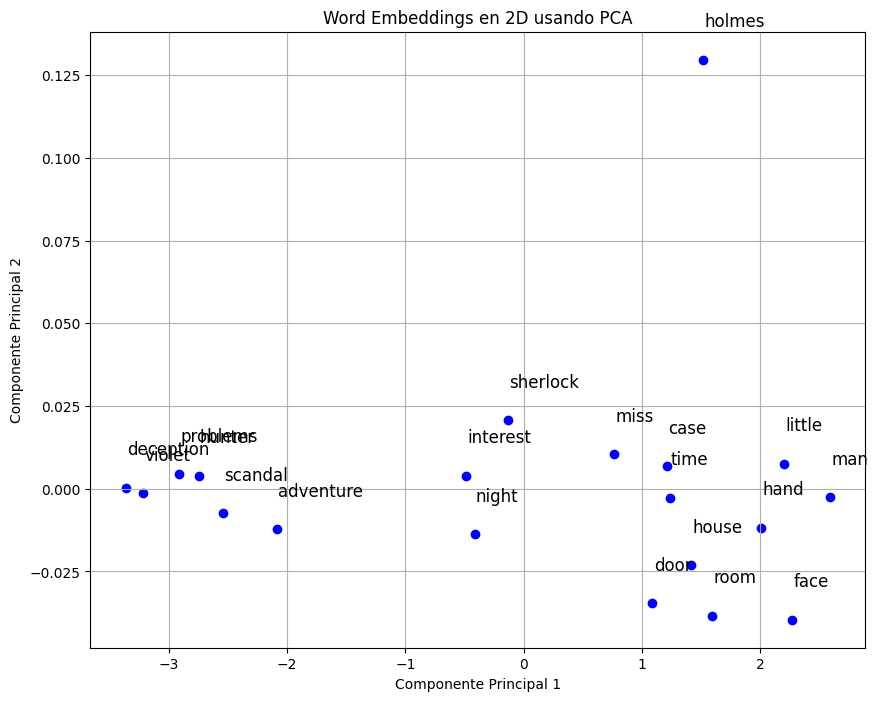

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Obtener los vectores de embedding de cada palabra
embeddings_matrix = [model.wv[word] for word in words]

# Reducir la dimensionalidad de los embeddings a 2 dimensiones para graficar
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Graficar los embeddings en 2D
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word Embeddings en 2D usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()

 El gráfico ofrece una representación visual que refleja cómo las palabras se relacionan entre sí en un espacio semántico, permitiendo identificar agrupaciones y relaciones significativas.

In [39]:
# Obtener palabras similares a 'door'
similar_words = model.wv.most_similar('door', topn=10)
print(similar_words)


[('upon', 0.999817430973053), ('light', 0.9997959136962891), ('like', 0.999788224697113), ('two', 0.999786913394928), ('face', 0.9997826218605042), ('man', 0.9997791051864624), ('find', 0.9997708201408386), ('room', 0.9997687339782715), ('back', 0.9997650980949402), ('one', 0.9997627139091492)]


#3.NLTK

- Tokenización, stopwords y Lematización

In [41]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt

# Descargo los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')




# Tokenización
tokens = word_tokenize(texto_completo)

# Elimino stopwords
stop_words = set(stopwords.words('english'))

filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Ejemplo Prueba de tokens filtrados
# filtered_tokens = ["running", "said", "better", "happily"]

# Función para mapear los POS de NLTK a los de WordNet
def get_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Si no se puede determinar, asumimos sustantivo


# Lematización
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []

for word in filtered_tokens:
    nltk_pos = nltk.pos_tag([word])[0][1]  # Obtiene el POS
    wordnet_pos = get_wordnet_pos(nltk_pos)  # Convierte el POS de NLTK al formato de WordNet
    lemmatized_word = lemmatizer.lemmatize(word, pos=wordnet_pos)  # Lematiza usando el POS adecuado
    lemmatized_tokens.append(lemmatized_word)

print(lemmatized_tokens)

#salio bien la prueba
#['run', 'say', 'well', 'happily']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


['Adventures', 'Sherlock', 'Holmes', 'Arthur', 'Conan', 'Doyle', 'Contents', 'Scandal', 'Bohemia', 'II', 'League', 'III', 'Case', 'Identity', 'IV', 'Boscombe', 'Valley', 'Mystery', 'Five', 'Orange', 'Pips', 'VI', 'Man', 'Twisted', 'Lip', 'VII', 'Adventure', 'Blue', 'Carbuncle', 'VIII', 'Adventure', 'Speckled', 'Band', 'IX', 'Adventure', 'Engineer', 'Thumb', 'X', 'Adventure', 'Noble', 'Bachelor', 'XI', 'Adventure', 'Beryl', 'Coronet', 'XII', 'Adventure', 'Copper', 'Beeches', 'SCANDAL', 'BOHEMIA', 'Sherlock', 'Holmes', 'always', 'woman', 'seldom', 'heard', 'mention', 'name', 'eye', 'eclipse', 'predominates', 'whole', 'sex', 'felt', 'emotion', 'akin', 'love', 'Irene', 'Adler', 'emotion', 'one', 'particularly', 'abhorrent', 'cold', 'precise', 'admirably', 'balance', 'mind', 'take', 'perfect', 'reason', 'observe', 'machine', 'world', 'see', 'lover', 'would', 'place', 'false', 'position', 'never', 'spoke', 'softer', 'passion', 'save', 'gibe', 'sneer', 'admirable', 'thing', 'draw', 'veil', 'm

In [42]:
from collections import Counter

# Contar la frecuencia de cada palabra
word_freq_lemmatized = Counter(lemmatized_tokens)

with open("lemmatized_tokens_antologia.txt", "w") as file:
    file.write(" ".join(lemmatized_tokens))

# Mostrar las palabras más comunes
print("Palabras más comunes:")
print(word_freq_lemmatized.most_common(30))

Palabras más comunes:
[('say', 604), ('upon', 462), ('Holmes', 452), ('one', 334), ('come', 331), ('would', 321), ('see', 310), ('man', 296), ('could', 281), ('little', 268), ('go', 242), ('take', 209), ('make', 206), ('know', 202), ('may', 189), ('hand', 183), ('think', 180), ('u', 178), ('look', 168), ('shall', 168), ('time', 162), ('must', 160), ('room', 154), ('give', 144), ('door', 143), ('face', 137), ('matter', 135), ('back', 135), ('two', 133), ('ask', 129)]


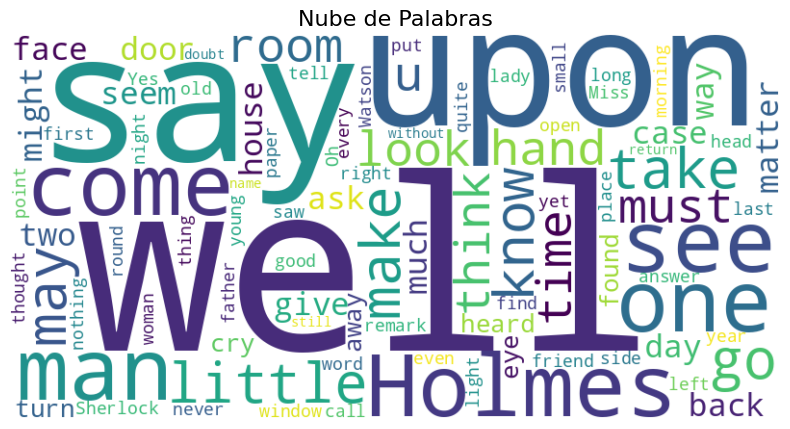

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

df_lemmatized = pd.DataFrame(word_freq_lemmatized.most_common(100), columns=["Palabra", "Frecuencia"])
df_lemmatized.to_csv("frecuencias_lemmatized_libro.csv", index=False, encoding="utf-8")

# Unir todo en un solo texto

texto_total_lemmatized = " ".join(df_lemmatized["Palabra"])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(texto_total_lemmatized)

# Graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Oculta los ejes
plt.title("Nube de Palabras", fontsize=16)
plt.show()


In [44]:
sentences = nltk.sent_tokenize(texto_completo)
for sentence in sentences[:15]:  # Muestra las primeras 5 sentencias
    blob = TextBlob(sentence)
    print(f"Sentencia: {sentence}")
    print(f"Polaridad: {blob.sentiment.polarity}")


Sentencia: The Adventures of Sherlock Holmes by Arthur Conan Doyle ________________________________________ Contents I.
Polaridad: 0.0
Sentencia: A Scandal in Bohemia II.
Polaridad: 0.0
Sentencia: The Red-Headed League III.
Polaridad: 0.0
Sentencia: A Case of Identity IV.
Polaridad: 0.0
Sentencia: The Boscombe Valley Mystery V. The Five Orange Pips VI.
Polaridad: 0.0
Sentencia: The Man with the Twisted Lip VII.
Polaridad: -0.5
Sentencia: The Adventure of the Blue Carbuncle VIII.
Polaridad: 0.0
Sentencia: The Adventure of the Speckled Band IX.
Polaridad: 0.0
Sentencia: The Adventure of the Engineer’s Thumb X.
Polaridad: 0.0
Sentencia: The Adventure of the Noble Bachelor XI.
Polaridad: 0.6
Sentencia: The Adventure of the Beryl Coronet XII.
Polaridad: 0.0
Sentencia: The Adventure of the Copper Beeches I.
Polaridad: 0.0
Sentencia: A SCANDAL IN BOHEMIA I.
Polaridad: 0.0
Sentencia: To Sherlock Holmes she is always the woman.
Polaridad: 0.0
Sentencia: I have seldom heard him mention her under

In [45]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt

# Descargo los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')

# Texto de ejemplo
#text = "Sherlock Holmes is a brilliant detective."
text ="You would certainly have been burned, had you lived a few centuries ago. It is true that I had a country walk on Thursday and came home in a dreadful mess, but as I have changed my clothes I can’t imagine how you deduce it."
# Tokenización
tokens = nltk.word_tokenize(text)

# POS-tagging
pos_tags = nltk.pos_tag(tokens)

# Mostrar los resultados
print(pos_tags)


[('You', 'PRP'), ('would', 'MD'), ('certainly', 'RB'), ('have', 'VB'), ('been', 'VBN'), ('burned', 'VBN'), (',', ','), ('had', 'VBD'), ('you', 'PRP'), ('lived', 'VBD'), ('a', 'DT'), ('few', 'JJ'), ('centuries', 'NNS'), ('ago', 'RB'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('true', 'JJ'), ('that', 'IN'), ('I', 'PRP'), ('had', 'VBD'), ('a', 'DT'), ('country', 'NN'), ('walk', 'NN'), ('on', 'IN'), ('Thursday', 'NNP'), ('and', 'CC'), ('came', 'VBD'), ('home', 'NN'), ('in', 'IN'), ('a', 'DT'), ('dreadful', 'JJ'), ('mess', 'NN'), (',', ','), ('but', 'CC'), ('as', 'IN'), ('I', 'PRP'), ('have', 'VBP'), ('changed', 'VBN'), ('my', 'PRP$'), ('clothes', 'NNS'), ('I', 'PRP'), ('can', 'MD'), ('’', 'VB'), ('t', 'JJ'), ('imagine', 'VB'), ('how', 'WRB'), ('you', 'PRP'), ('deduce', 'VBP'), ('it', 'PRP'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


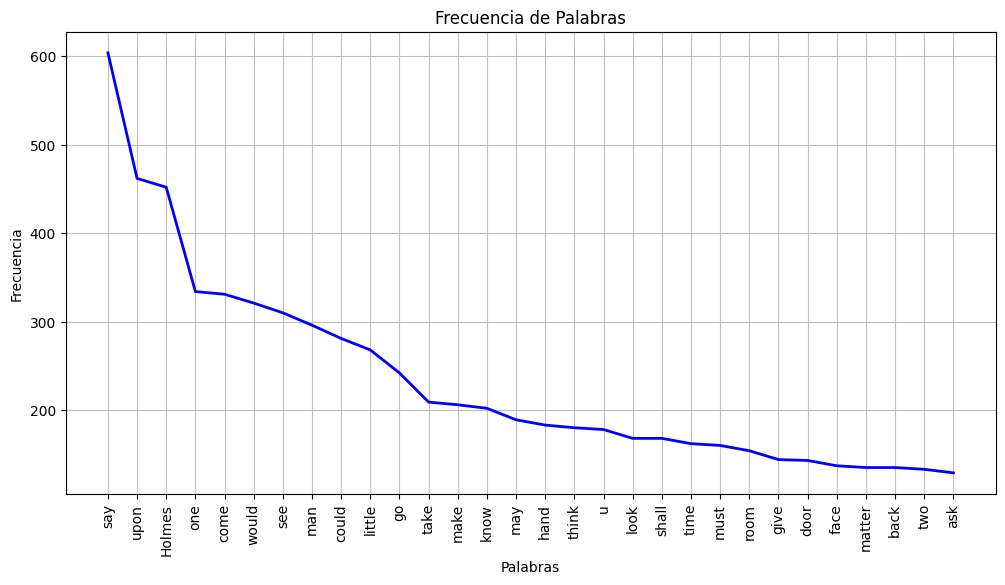

In [46]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Calcular la frecuencia de las palabras
freq_dist = FreqDist(lemmatized_tokens)

# Visualización de las palabras más frecuentes de la lematización
# Graficar en un solo gráfico
plt.figure(figsize=(12, 6))

# Frecuencia antes de la lematización
freq_dist.plot(30, cumulative=False, color="blue")

plt.title("Frecuencia de Palabras")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.show()



##Análisis de Sentimiento




In [47]:
# Análisis de Sentimientos con TextBlob
sentences = nltk.sent_tokenize(texto_completo)

cant_sentencias=len(sentences)
cant_sentencias

4715

In [48]:
import pandas as pd
# Crear listas vacías para almacenar las sentencias, polaridad y subjetividad
sentences_list = []
polarities_list = []
subjectivities_list = []

# Análisis de Sentimientos con TextBlob
for sentence in sentences[:cant_sentencias]:  # Muestra las primeras 10000 sentencias
    blob = TextBlob(sentence)
    sentences_list.append(sentence)
    polarities_list.append(blob.sentiment.polarity)
    subjectivities_list.append(blob.sentiment.subjectivity)

# Crear un DataFrame con los resultados
df_sentiment = pd.DataFrame({
    'Sentence': sentences_list,
    'Polarity': polarities_list,
    'Subjectivity': subjectivities_list
})


In [49]:
df_sentiment.head(15)

,Sentence,Polarity,Subjectivity
0,The Adventures of Sherlock Holmes by Arthur Co...,0.000,0.000
1,A Scandal in Bohemia II.,0.000,0.000
2,The Red-Headed League III.,0.000,0.000
3,A Case of Identity IV.,0.000,0.000
4,The Boscombe Valley Mystery V. The Five Orange...,0.000,0.000
5,The Man with the Twisted Lip VII.,-0.500,1.000
6,The Adventure of the Blue Carbuncle VIII.,0.000,0.100
7,The Adventure of the Speckled Band IX.,0.000,0.000
8,The Adventure of the Engineer’s Thumb X.,0.000,0.000
9,The Adventure of the Noble Bachelor XI.,0.600,0.900


In [50]:
df_sentiment.describe()

,Polarity,Subjectivity
count,4715.000000,4715.000000
mean,0.043577,0.357588
std,0.238761,0.302919
min,-1.000000,0.000000
25%,-0.022569,0.000000
50%,0.000000,0.375000
75%,0.135565,0.561746
max,1.000000,1.000000


- Polaridad

Un promedio de **0.0436** es bastante bajo y cercano a 0, lo que sugiere que, en general, los capítulos del libro no están cargados de emociones intensas (positivas ni negativas).

Esto es típico de textos narrativos donde se prioriza la descripción y la resolución de misterios en lugar de emociones extremas.
Aunque la polaridad es ligeramente positiva, su valor cercano a 0 sugiere que los sentimientos son bastante neutrales o moderados en su mayoría.

- Subjetividad


Un promedio de **0.3576** indica que el texto tiene una subjetividad moderada. No es completamente objetivo ni completamente emocional.

Esto sugiere que, aunque el libro tiene una trama en torno a misterios y resolución lógica, puede haber ciertos momentos donde se incluyen pensamientos y opiniones (por ejemplo, las percepciones de los personajes o las emociones contenidas en los diálogos).

In [51]:
# Filtrar por polaridad negativa (por ejemplo, < -0.2)
polaridad_negativa = df_sentiment[df_sentiment['Polarity'] < -0.2]

# Filtrar por subjetividad alta (por ejemplo, > 0.75)
subjetividad_alta = df_sentiment[df_sentiment['Subjectivity'] > 0.75]

# Mostrar los resultados
print("Fragmentos con Polaridad Negativa:")
print(polaridad_negativa[['Sentence', 'Polarity', 'Subjectivity']])

print("\nFragmentos con Subjetividad Alta:")
print(subjetividad_alta[['Sentence', 'Polarity', 'Subjectivity']])


Fragmentos con Polaridad Negativa:
                                               Sentence  Polarity  \
5                     The Man with the Twisted Lip VII. -0.500000   
23    And yet there was but one woman to him, and th... -0.400000   
24                  I had seen little of Holmes lately. -0.243750   
33    He was pacing the room swiftly, eagerly, with ... -0.400000   
43    “I think, Watson, that you have put on seven a... -0.208333   
...                                                 ...       ...   
4669  I tell you that he is a clever and dangerous man. -0.216667   
4678  I’ll serve you!” He turned and clattered down ... -0.223611   
4682  We had hardly reached the hall when we heard t... -0.472917   
4690  With much labour we separated them and carried... -0.400000   
4701  She was slighted like and had no say in anythi... -0.400000   

      Subjectivity  
5         1.000000  
23        0.800000  
24        0.550000  
33        0.700000  
43        0.166667  
...       

In [52]:
polaridad_negativa

,Sentence,Polarity,Subjectivity
5,The Man with the Twisted Lip VII.,-0.500000,1.000000
23,"And yet there was but one woman to him, and th...",-0.400000,0.800000
24,I had seen little of Holmes lately.,-0.243750,0.550000
33,"He was pacing the room swiftly, eagerly, with ...",-0.400000,0.700000
43,"“I think, Watson, that you have put on seven a...",-0.208333,0.166667
...,...,...,...
4669,I tell you that he is a clever and dangerous man.,-0.216667,0.866667
4678,I’ll serve you!” He turned and clattered down ...,-0.223611,0.415278
4682,We had hardly reached the hall when we heard t...,-0.472917,0.735417
4690,With much labour we separated them and carried...,-0.400000,0.600000


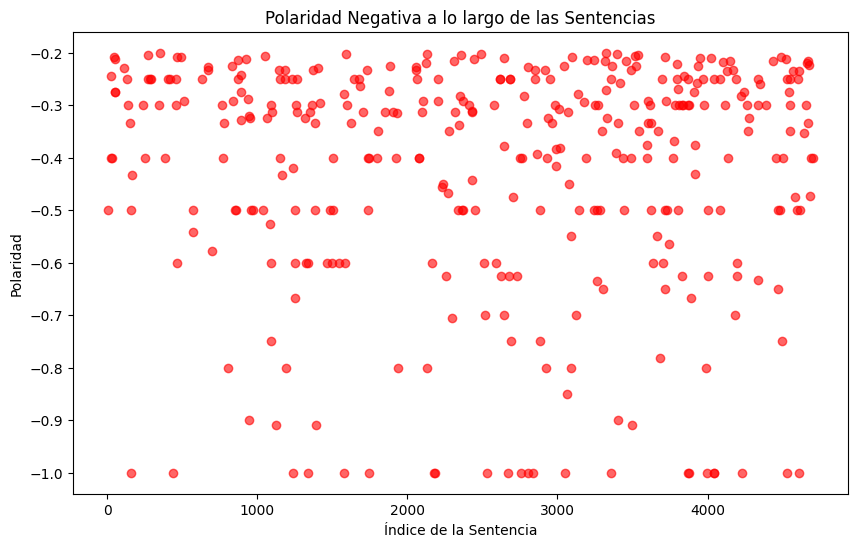

In [53]:
# Graficar las sentencias con polaridad negativa por índice
plt.figure(figsize=(10, 6))
plt.scatter(polaridad_negativa.index, polaridad_negativa['Polarity'], color='red', alpha=0.6)
plt.title('Polaridad Negativa a lo largo de las Sentencias')
plt.xlabel('Índice de la Sentencia')
plt.ylabel('Polaridad')
plt.show()

No parece haber una tendencia clara en cuanto a la variación de la polaridad a lo largo del índice de las oraciones. La distribución parece ser aleatoria, sin patrones que indiquen cambios significativos a medida que se avanza en el texto.

#4.TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re

def calculate_tfidf (text):
    #tokenize text and remove stopwords
    stop_words = set (stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize (text.lower())
    filtered_tokens = [lemmatizer.lemmatize (word) for word in tokens if word.isalpha() and word not in stop_words]
    preprocessed_text =" ".join(filtered_tokens)

    # compute tf-idf
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([preprocessed_text])

    # convert tf-idf matrix to df
    df_tfidf = pd. DataFrame(tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out())

    return df_tfidf, tfidf_vectorizer.get_feature_names_out()


# application to text

text=texto_completo
tfidf_df, vocabulary = calculate_tfidf(text)
# display result
print("TF-IDF DataFrame:")
tfidf_df

TF-IDF DataFrame:


,abandon,abandoned,abbot,aberdeen,abhorrent,abjure,able,abnormal,abnormally,abode,...,yonder,young,younger,youngster,youth,zealand,zero,zest,zigzag,œuvre
0,0.000601,0.001803,0.000601,0.001202,0.000601,0.000601,0.018627,0.000601,0.000601,0.000601,...,0.000601,0.04867,0.001803,0.001202,0.004206,0.000601,0.000601,0.000601,0.000601,0.000601


In [61]:

# Ordenar por los valores de TF-IDF en la primera fila (que es la que corresponde a tu texto)
df_tfidf_sorted = tfidf_df.iloc[0].sort_values(ascending=False)

# Mostrar las 10 palabras más importantes (con mayor TF-IDF)
print(df_tfidf_sorted.head(10))


said      0.291417
upon      0.278799
holmes    0.273391
one       0.223520
would     0.195880
man       0.179657
could     0.171846
little    0.161030
see       0.135794
may       0.118369
Name: 0, dtype: float64


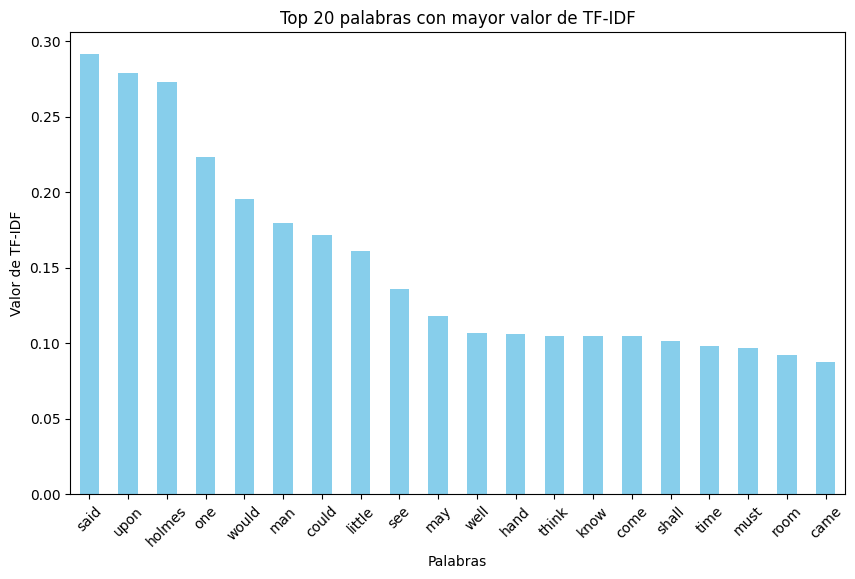

In [63]:
import matplotlib.pyplot as plt

# Seleccionar las 10 palabras más importantes
top_20 = df_tfidf_sorted.head(20)

# Graficar
top_20.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 20 palabras con mayor valor de TF-IDF')
plt.xlabel('Palabras')
plt.ylabel('Valor de TF-IDF')
plt.xticks(rotation=45)
plt.show()


**Palabras Clave:** Las palabras "said" y "holmes" tienen los valores más altos de TF-IDF, indicando que son centrales en el texto analizado y probablemente representan temas o conceptos importantes dentro del contenido.


**Frecuencia y Exclusividad:** Un alto valor de TF-IDF sugiere que estas palabras son frecuentes en el documento pero no en muchos otros documentos, lo que las hace relevantes para el análisis específico de este texto.


**Diversidad de Términos:** Las otras palabras listadas, como "man", "well","little", "may", aunque tienen valores más bajos, aún son significativas y contribuyen a la comprensión del contenido del texto.


**Conexión Temática:** Palabras como "said" y "holmes" pueden sugerir que el texto contempla diálogos o referencia a personajes, posiblemente en un contexto narrativo relacionado con misterio o investigación.